In [1]:
!pip install nltk
!pip install gensim
!pip install pyspellchecker
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 42.6 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import string
from sklearn.ensemble import RandomForestClassifier
import warnings
from spellchecker import SpellChecker
import nltk
nltk.download('punkt')
from tensorflow.keras.layers import SimpleRNN, Dense
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
nltk.download('stopwords')
nltk.download('punkt_tab')
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import plotly.graph_objects as go
import gensim
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
df=pd.read_csv("/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv")
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.isnull().sum()

,0
Review,1
Sentiment,0


In [6]:
classes_distribution=df['Sentiment'].value_counts()
print(classes_distribution)

Sentiment
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64


In [31]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: 0 if x < 3 else 1)

In [32]:
def preprocess_text(text):
    text=str(text)
    regex=re.compile('<.*?>')
    text=re.sub(regex,'',text)
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text_translation = str.maketrans('', '', string.punctuation)
    text = text.translate(text_translation)
    stop_words = set(stopwords.words('english'))
    text = text.split()
    filtered_words = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    spell = SpellChecker()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    return stemmed_words
def make_word_cloud(df,option):
  ## pass option for sentiment wise wordcloud
  if option==0:
    label='Negative Sentiments'
    df=df[df['Sentiment']==0]
  elif option==1:
    label='Positive Sentiments'
    df=df[df['Sentiment']==1]
  consolidated=' '.join(word for word in df['Review'].astype(str))
  wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
  plt.figure(figsize=(15,10))
  plt.title(label,fontsize=20)
  plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
  plt.axis('off')
  plt.show()

def convert_sentences_to_vectors(sentence, word2vec_model):
    word_embeddings = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]

    if len(word_embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no valid words found
    else:
        return np.mean(word_embeddings, axis=0)
def tokenize(text):
    if isinstance(text, str):  # Ensure the text is a string before tokenizing
        return word_tokenize(text)
    return []


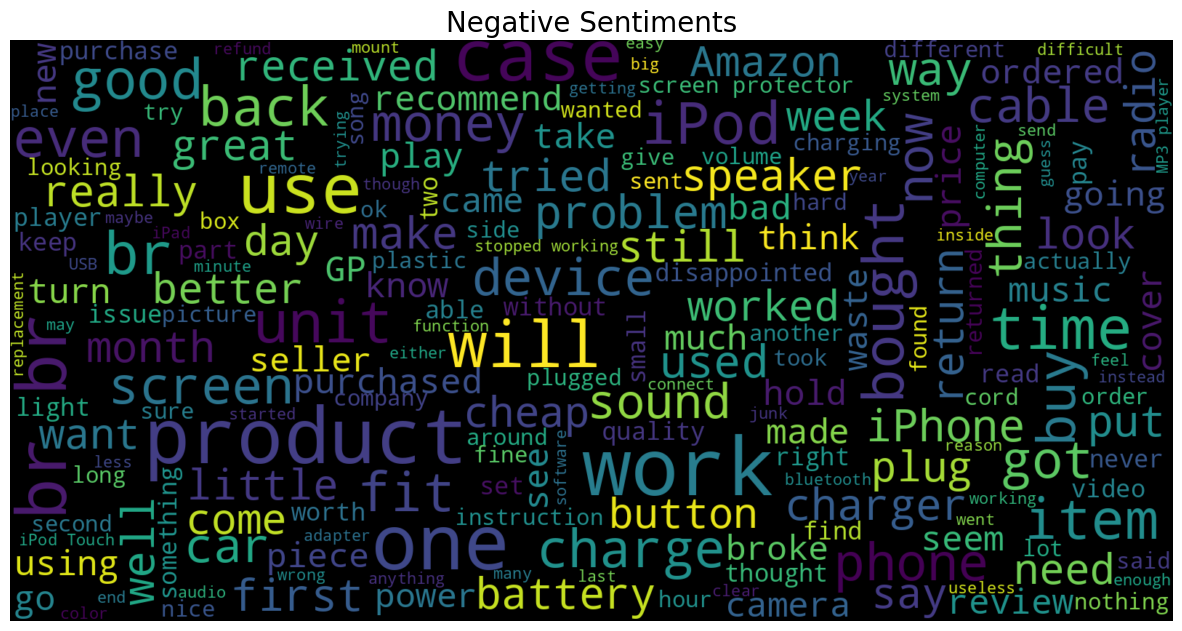

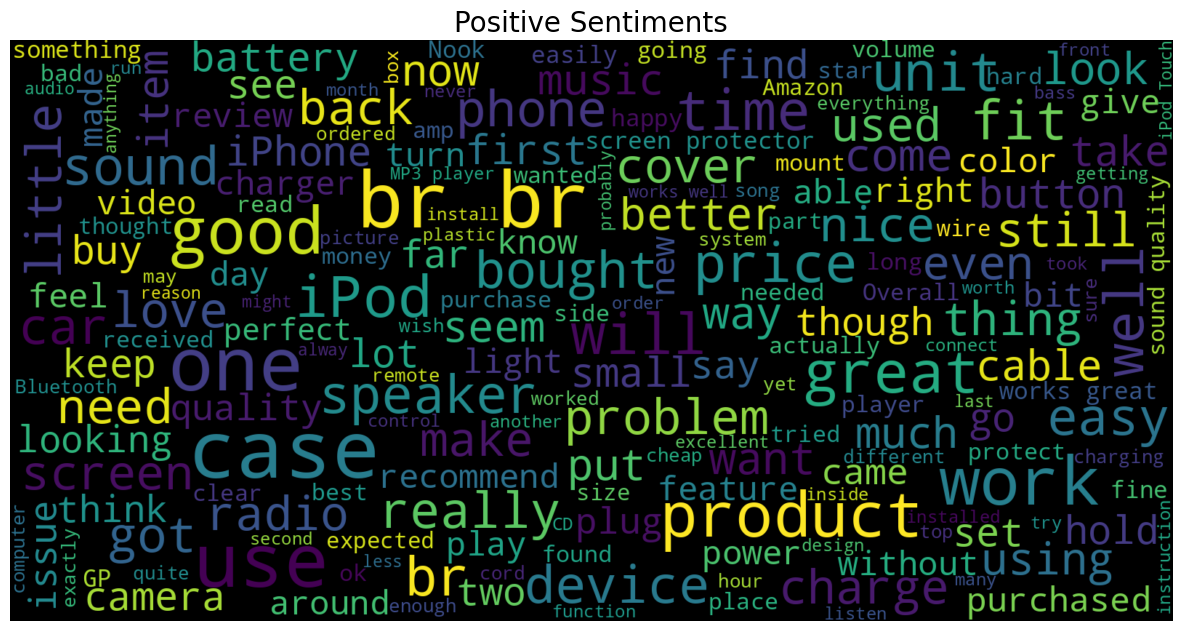

In [ ]:
## word cloud of sentiments
make_word_cloud(df,0)
make_word_cloud(df,1)

In [9]:
df['Review']
df['Reivew']=df['Review'].apply(preprocess_text)

KeyboardInterrupt: 

In [10]:
df.dropna(inplace=True)

In [ ]:
df.to_csv('cleaned_amazon_reviews_data.csv',index=False)

In [11]:
word2vec_model=Word2Vec(sentences=df['Review'],vector_size=124,window=3,sg=1,min_count=1,workers=4)

KeyboardInterrupt: 

In [ ]:
word2vec_model.save("word2vec_model_trained")

In [12]:
word2vec_model=Word2Vec.load("word2vec_model_trained")

In [ ]:
df['Review']=df['Review'].apply(convert_sentences_to_vectors,args=(word2vec_model,))

In [ ]:
df['Review']

,Review
0,"[0.03302685, -0.011357504, -0.12836531, 0.1398..."
1,"[0.007535826, -0.021059055, -0.15336129, 0.108..."
2,"[0.036891032, -0.0064589856, -0.13563125, 0.12..."
3,"[0.039402578, -0.008292762, -0.14087799, 0.146..."
4,"[0.041899312, -0.009741361, -0.1428505, 0.1393..."
...,...
24995,"[0.035094306, -0.0052363966, -0.13108803, 0.14..."
24996,"[0.034270722, -0.003486181, -0.14054337, 0.140..."
24997,"[0.03735959, -0.0056629837, -0.12274054, 0.143..."
24998,"[0.031736348, -0.0040466352, -0.1430544, 0.139..."


# Logistic

In [ ]:
def logistic(df):
  X = np.array(df['Review'].tolist())
  y = df['Sentiment'].values
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  log_reg_model = LogisticRegression(max_iter=1000)
  log_reg_model.fit(X_train, y_train)


  y_pred = log_reg_model.predict(X_test)

  y_pred=log_reg_model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred))
logistic(df)

Accuracy: 0.6084


# Logistic Regression


# Support Vector Machines

In [ ]:
def support_vector_machine(df):
  X = np.array(df['Review'].tolist())
  y = df['Sentiment'].values
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred))
support_vector_machine(df)

AttributeError: 'SVC' object has no attribute 'save'

# Random Forest Model

In [ ]:
def random_forest(df):
  X = np.array(df['Review'].tolist())
  y = df['Sentiment'].values
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  rf_model = RandomForestClassifier()
  rf_model.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred))
random_forest(df)

Accuracy: 0.644


# Gradient Boosting Machines (XGBOOST,LIGHTGBM, CatBoost)

# Recurrent Neural Network

In [63]:
df=pd.read_csv("/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv")
df['Sentiment'] = df['Sentiment'].apply(lambda x: 0 if x < 3 else 1)
df['Review']=df['Review'].astype(str)
df['Reivew']=df["Review"].apply(convert_sentences_to_vectors,args=(word2vec_model,))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6023 - loss: 0.6714 - val_accuracy: 0.5958 - val_loss: 0.6662
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5964 - loss: 0.6586 - val_accuracy: 0.5958 - val_loss: 0.6672
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6002 - loss: 0.6579 - val_accuracy: 0.6250 - val_loss: 0.6416
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6296 - loss: 0.6417 - val_accuracy: 0.6114 - val_loss: 0.6508
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 3.
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.61      0.19      0.30      2021
           1       0.63      0.92      0.74      2979

    accuracy                           0.62      5000
   macro avg       0.62      0.56      0.52      5000
weighted avg       0.62      0.62      0.56      5000

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

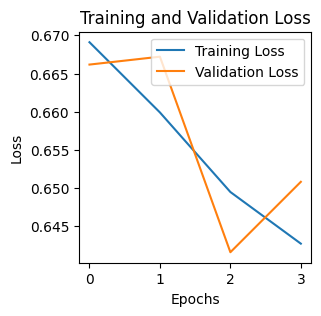

<Sequential name=Simple_RNN, built=True>

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping



def rnn(data, word2vec_model):

    data.dropna(inplace=True)

    X_train, X_test, y_train, y_test = train_test_split(data['Reivew'], data['Sentiment'], test_size=0.2, random_state=42)

    # Convert list of vectors to numpy arrays
    X_train = np.array(X_train.tolist())
    X_test = np.array(X_test.tolist())

    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # (19999, 1, 124)
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    # Input shape should be (timesteps, features)
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    # Set the EarlyStopping callback to monitor validation loss
    early_stopping = EarlyStopping(
        monitor='val_loss',           # Monitor validation loss
        min_delta=0.001,              # Minimum change to qualify as an improvement
        patience=3,                   # Number of epochs to wait for improvement
        verbose=1,                    # Show messages when stopping
        mode='min',                   # Stop when the validation loss is minimized
        baseline=0.63,              # Stop training when validation loss reaches this value or lower
        restore_best_weights=True     # Restore the model with the best weights
    )


    model = Sequential(name='Simple_RNN')
    model.add(SimpleRNN(256, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True))
    model.add(SimpleRNN(64, activation='relu', return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    rmsprop_optimizer = RMSprop(learning_rate=0.001)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

     # Train the model with EarlyStopping callback
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]   # Pass the early stopping callback here
    )
    y_pred=model.predict(X_test)

    print(classification_report(y_test, y_pred))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
    plt.figure(figsize=(3, 3))


    plt.plot(history.history['loss'], label='Training Loss')

    # Plot validation loss
    plt.plot(history.history['val_loss'], label='Validation Loss')

    # Add title and labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()
    model.save('rnn_trained.h5')


    return model
rnn(df,word2vec_model)

First few review embedding shapes: [(124,), (124,), (124,), (124,), (124,), (124,), (124,), (124,), (124,), (124,)]
Unique shapes of the embeddings: {(124,)}
All reviews have the same shape.


# Long short term memory network (LSTMs)

In [87]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
def lstm(data):
    # Drop any rows with missing values
    data.dropna(inplace=True)


    X = np.array(data['Reivew'].tolist())  # The review embeddings as a list of lists
    y = data['Sentiment'].values  # Labels (Sentiment)

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # (19999, 1, 124)
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    # Input shape should be (timesteps, features)
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),  # LSTM layer
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

    return model
lstm(df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5992 - loss: 0.6740 - val_accuracy: 0.5958 - val_loss: 0.6719
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5961 - loss: 0.6702 - val_accuracy: 0.5960 - val_loss: 0.6594
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6042 - loss: 0.6595 - val_accuracy: 0.6104 - val_loss: 0.6478
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6188 - loss: 0.6453 - val_accuracy: 0.6176 - val_loss: 0.6534
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6323 - loss: 0.6403 - val_accuracy: 0.6258 - val_loss: 0.6402
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6172 - loss: 0.6465 - val_accuracy: 0.6290 - val_loss: 0.6433
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6304 - loss: 0.6413 - val_accuracy: 0.6354 - val_loss: 0.6372
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6346 - loss: 0.6372 - val_accuracy: 0.

<Sequential name=sequential_4, built=True>

# BERT

# DistilBert

# RoBERTa

# XLNet